# Práctica Machine Learning

## 0 - IMPORTACION DE LIBRERIAS, FICHERO AIRBNB Y PREPARACION DE LOS DATASET EN FICHEROS

#### 0.0 - Importación de las librerías

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline 
plt.style.use("Solarize_Light2")

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#### 0.1 - Carga de datos 

In [2]:
df = pd.read_csv('airbnb-listings-extract.csv', sep=';', decimal='.')

#### 0.2 Dividimos el dataset en train y test

In [3]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


#### 0.3 Cargamos el dataset para TRAINING 

In [4]:
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

In [5]:
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [6]:
df_train.shape

(11824, 89)

## 1 - LIMPIEZA DE LOS DATOS DEL DATASET DE TRAINING

#### 1.1 - LIMPIEZA DE COLUMNAS

In [7]:
columnas = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview']
df_train.loc[:,columnas].head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN


In [8]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     11824 non-null  int64 
 1   Listing Url            11824 non-null  object
 2   Scrape ID              11824 non-null  int64 
 3   Last Scraped           11824 non-null  object
 4   Name                   11823 non-null  object
 5   Summary                11355 non-null  object
 6   Space                  8718 non-null   object
 7   Description            11818 non-null  object
 8   Experiences Offered    11824 non-null  object
 9   Neighborhood Overview  7309 non-null   object
dtypes: int64(2), object(8)
memory usage: 923.9+ KB


* no considero ninguna interesante

In [9]:
columnas = ['Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']
df_train.loc[:,columnas].head()

,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url
0,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...
1,Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...
2,NaN,羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/05baad20-7...,https://a0.muscache.com/im/pictures/05baad20-7...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/05baad20-7...
3,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/111496270/...,https://a0.muscache.com/im/pictures/111496270/...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/111496270/...
4,NaN,NaN,WE CAN DO TO HOST COLLECTION SERVICE FROM THE ...,NaN,"In the apartment smoking is not allowed, but i...",https://a0.muscache.com/im/pictures/17487722/1...,https://a0.muscache.com/im/pictures/17487722/1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/17487722/1...


In [10]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Notes           4543 non-null   object
 1   Transit         7243 non-null   object
 2   Access          6663 non-null   object
 3   Interaction     6594 non-null   object
 4   House Rules     7681 non-null   object
 5   Thumbnail Url   9529 non-null   object
 6   Medium Url      9529 non-null   object
 7   Picture Url     11806 non-null  object
 8   XL Picture Url  9529 non-null   object
dtypes: object(9)
memory usage: 831.5+ KB


* no considero ninguna interesante

In [11]:
columnas = ['Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate']
df_train.loc[:,columnas].head()

,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate
0,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0
1,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0
2,84213235,https://www.airbnb.com/users/show/84213235,玲,2016-07-17,"Madrid, Community of Madrid, Spain","Our hotel near the city center, next to the su...",within an hour,100.0
3,15258781,https://www.airbnb.com/users/show/15258781,Erasmo´S,2014-05-08,"Madrid, Community of Madrid, Spain",Disfruta de tu habitación en el centro de Madr...,within a few hours,100.0
4,1706029,https://www.airbnb.com/users/show/1706029,David Y Ana,2012-02-06,"Madrid, Community of Madrid, Spain","Somos una pareja de Español y Colombiana, amab...",within an hour,100.0


In [12]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Host ID             11824 non-null  int64  
 1   Host URL            11824 non-null  object 
 2   Host Name           11821 non-null  object 
 3   Host Since          11821 non-null  object 
 4   Host Location       11790 non-null  object 
 5   Host About          7664 non-null   object 
 6   Host Response Time  10317 non-null  object 
 7   Host Response Rate  10317 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 739.1+ KB


* Host Response Time: Tiempo de respuesta del anfitrión. Puede ser interesante.
* Host Response Rate: Ratio de respuesta del anfitrión. Puede ser interesante.

In [13]:
columnas = ['Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street']
df_train.loc[:,columnas].head()

,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street
0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ..."
1,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain"
2,NaN,https://a0.muscache.com/im/pictures/a4185ec1-7...,https://a0.muscache.com/im/pictures/a4185ec1-7...,Carabanchel,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...","Carabanchel, Madrid, Comunidad de Madrid 28025..."
3,NaN,https://a0.muscache.com/im/users/15258781/prof...,https://a0.muscache.com/im/users/15258781/prof...,Justicia,114.0,114.0,"email,phone,reviews,work_email","Madrid, Comunidad de Madrid 28012, Spain"
4,NaN,https://a0.muscache.com/im/users/1706029/profi...,https://a0.muscache.com/im/users/1706029/profi...,Gaztambide,2.0,2.0,"email,phone,reviews,jumio","Gaztambide, Madrid, 28 28015, Spain"


In [14]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Acceptance Rate       30 non-null     object 
 1   Host Thumbnail Url         11821 non-null  object 
 2   Host Picture Url           11821 non-null  object 
 3   Host Neighbourhood         8742 non-null   object 
 4   Host Listings Count        11821 non-null  float64
 5   Host Total Listings Count  11821 non-null  float64
 6   Host Verifications         11820 non-null  object 
 7   Street                     11824 non-null  object 
dtypes: float64(2), object(6)
memory usage: 739.1+ KB


* Host Verifications: Podría ser interesante considerar esta columna por el número de verificaciones. Sin embargo por simplificar la práctica no la voy a utilizar

In [15]:
columnas = ['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market']
df_train.loc[:,columnas].head()

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market
0,Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid
1,NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid
2,Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid
3,NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid
4,Gaztambide,Gaztambide,Chamberí,Madrid,28,28015,Madrid


In [16]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood                 7665 non-null   object
 1   Neighbourhood Cleansed        11824 non-null  object
 2   Neighbourhood Group Cleansed  11006 non-null  object
 3   City                          11820 non-null  object
 4   State                         11705 non-null  object
 5   Zipcode                       11426 non-null  object
 6   Market                        11780 non-null  object
dtypes: object(7)
memory usage: 646.8+ KB


* Neighbourhood: Puede ser interesante.
* City: Ciudad del inmueble. Puede ser interesante.
* Zipcode: Puede ser interesante.

In [17]:
columnas = ['Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 
            'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',]
df_train.loc[:,columnas].head()

,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price
0,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0
1,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN
2,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",NaN,10.0,NaN
3,"Madrid, Spain",ES,Spain,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",NaN,30.0,NaN
4,"Madrid, Spain",ES,Spain,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,32.0,NaN


In [18]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Smart Location  11824 non-null  object 
 1   Country Code    11824 non-null  object 
 2   Country         11823 non-null  object 
 3   Latitude        11824 non-null  float64
 4   Longitude       11824 non-null  float64
 5   Property Type   11824 non-null  object 
 6   Room Type       11824 non-null  object 
 7   Accommodates    11824 non-null  int64  
 8   Bathrooms       11780 non-null  float64
 9   Bedrooms        11804 non-null  float64
 10  Beds            11787 non-null  float64
 11  Bed Type        11824 non-null  object 
 12  Amenities       11683 non-null  object 
 13  Square Feet     474 non-null    float64
 14  Price           11809 non-null  float64
 15  Weekly Price    2881 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory usage: 1.4+ MB


* Latitude: Latitud del inmueble. Puede ser interesante.
* Longitude: Latitud del inmueble. Puede ser interesante.
* Property Type: Tipo de inmueble, Puede ser interesante
* Room Type: Tipo de alquiler, Puede ser interesante.
* Accommodates: Número de personas que entran en el inmueble, Puede ser interesante.
* Bathrooms: Número de baños que hay en el inmueble, Puede ser interesante.
* Bedrooms: Número de dormitorios que hay en el inmueble, Puede ser interesante.
* Amenities: Lo mismo que con 'Host Verifications'.
* Square Feet: Número de pies cuadrados que tiene el inmueble, Puede ser interesante.

In [19]:
columnas = ['Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',]
df_train.loc[:,columnas].head()

,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped
0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08
1,NaN,15.0,1,0,1,1125,today,NaN,15,39,64,208,2017-04-08
2,NaN,5.0,1,0,3,30,a week ago,NaN,14,44,74,140,2017-04-08
3,NaN,NaN,1,0,10,1125,3 days ago,NaN,0,6,36,311,2017-04-08
4,NaN,NaN,1,10,1,1125,5 days ago,NaN,7,34,62,337,2017-04-08


In [20]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Security Deposit       5052 non-null   float64
 1   Cleaning Fee           6974 non-null   float64
 2   Guests Included        11824 non-null  int64  
 3   Extra People           11824 non-null  int64  
 4   Minimum Nights         11824 non-null  int64  
 5   Maximum Nights         11824 non-null  int64  
 6   Calendar Updated       11824 non-null  object 
 7   Has Availability       9 non-null      object 
 8   Availability 30        11824 non-null  int64  
 9   Availability 60        11824 non-null  int64  
 10  Availability 90        11824 non-null  int64  
 11  Availability 365       11824 non-null  int64  
 12  Calendar last Scraped  11824 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1.2+ MB


* Security Deposit: Fianza que pide el anfitrión, Puede ser interesante.
* Cleaning Fee: Tasa de limpieza, Puede ser interesante.
* Guests Included: Número de invitados adicionales que puedes alojar en el inmueble, Puede ser interesante.
* Extra People: Importe a pagar por cada invitado adicional que puedes alojar en el inmueble, Puede ser interesante.
* Minimum Nights: Noches mínimas a alquilar. Puede ser interesante.
* Maximum Nights: Noches máximas a alquilar. Puede ser interesante.
* Availability 30, 60, 90, 365: Días de disponibilidad en los proxímos 30, 60, 90 y 365 días, Puede ser interesante.

In [21]:
columnas = ['Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location','Review Scores Value']
df_train.loc[:,columnas].head()

,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
0,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0
1,20,2016-08-05,2017-03-20,91.0,9.0,9.0,10.0,10.0,10.0,10.0
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97,2013-06-07,2017-02-28,92.0,9.0,9.0,9.0,10.0,9.0,9.0


In [22]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Reviews            11824 non-null  int64  
 1   First Review                 9285 non-null   object 
 2   Last Review                  9284 non-null   object 
 3   Review Scores Rating         9163 non-null   float64
 4   Review Scores Accuracy       9143 non-null   float64
 5   Review Scores Cleanliness    9148 non-null   float64
 6   Review Scores Checkin        9136 non-null   float64
 7   Review Scores Communication  9147 non-null   float64
 8   Review Scores Location       9133 non-null   float64
 9   Review Scores Value          9132 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 923.9+ KB


* Number of Reviews: Número de opiniones que tiene el inmueble, Puede ser interesante.

In [23]:
columnas = ['License', 'Jurisdiction Names', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features']
df_train.loc[:,columnas].head()

,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [24]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   License                         277 non-null    object 
 1   Jurisdiction Names              174 non-null    object 
 2   Cancellation Policy             11824 non-null  object 
 3   Calculated host listings count  11820 non-null  float64
 4   Reviews per Month               9285 non-null   float64
 5   Geolocation                     11824 non-null  object 
 6   Features                        11823 non-null  object 
dtypes: float64(2), object(5)
memory usage: 646.8+ KB


* Cancellation Policy: Tipo de cancelación de reserva del inmueble, Puede ser interesante.
* Calculated host listings count: Este campo es del que hablamos anteriormente, que mide la experiencia del anfitrión. Puede ser interesante.
* Features: Lo mismo que con 'Host Verifications'

#### 1.2 TRANSFORMACIONES

* Borramos las columnas que no hemos considerado interesantes.

In [25]:
df_train.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Beds', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 'Features' 
    ], 
    axis=1, inplace=True)

* Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed y eliminamos esta columna que ya no será necesaria

In [26]:
df_train['Neighbourhood'] = df_train['Neighbourhood'].fillna(df_train['Neighbourhood Cleansed'])
df_train.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

* Nos quedamos con los inmuebles de Madrid y eliminamos la columna City

In [27]:
df_train = df_train[df_train['City'] == "Madrid"]
df_train.drop(['City'], axis=1, inplace=True)

In [28]:
df_train.shape

(10567, 28)

In [29]:
df_train.columns

Index(['Host Response Time', 'Host Response Rate', 'Neighbourhood', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count'],
      dtype='object')

* De las 89 columnas iniciales nos hemos quedado con 28.
* Nos quedan las 10567 filas de Madrid.
### Mostramos una descripción de las columnas numéricas:

In [30]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9254.0,94.816944,15.283509,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,10567.0,40.420436,0.019802,40.332908,40.410092,40.418471,40.427683,40.514247
Longitude,10567.0,-3.697122,0.023267,-3.835498,-3.707766,-3.701573,-3.693876,-3.575142
Accommodates,10567.0,3.188228,1.989624,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10527.0,1.256863,0.608184,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10549.0,1.294909,0.833250,0.000000,1.000000,1.000000,2.000000,10.000000
Square Feet,413.0,375.266344,556.981908,0.000000,0.000000,97.000000,646.000000,5167.000000
Price,10559.0,66.185150,56.164160,9.000000,31.000000,53.000000,80.000000,875.000000
Weekly Price,2697.0,370.569892,190.764771,70.000000,210.000000,350.000000,495.000000,999.000000
Monthly Price,2673.0,1355.562290,1001.426079,250.000000,700.000000,1200.000000,1700.000000,25000.000000


* Eliminamos SquareFeet, WeeklyPrice, Security Deposit, Cleaning Fee y MonthlyPrice porque tienen muy pocos datos.

In [31]:
df_train.drop(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee'], axis=1, inplace=True)

* En la columna bathrooms rellenamos con valor 1.

In [32]:
df_train['Bathrooms'] = df_train['Bathrooms'].fillna(value=1)

* Los Bedrooms que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.

In [33]:
df_train['Bedrooms'].isnull().sum()

18

In [34]:
df_train.drop(df_train[df_train['Bedrooms'].isnull()].index, inplace = True)

* Los Price que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.

In [35]:
df_train['Price'].isnull().sum()

8

In [36]:
df_train.drop(df_train[df_train['Price'].isnull()].index, inplace = True)

* Los Host Response Rate faltantes los relleraremos con su media, guardamos el valor para rellenar el dataset de test con la misma media.

In [37]:
df_train['Host Response Rate'].value_counts()
mean_host_resp = df_train["Host Response Rate"].mean()
df_train["Host Response Rate"].fillna(mean_host_resp, inplace=True)

* Comprobamos que todos los datos numéricos están rellenos

In [38]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10541.0,94.833586,14.254026,0.000000,94.833586,100.000000,100.000000,100.000000
Latitude,10541.0,40.420444,0.019814,40.332908,40.410095,40.418449,40.427684,40.514247
Longitude,10541.0,-3.697110,0.023268,-3.835498,-3.707759,-3.701573,-3.693876,-3.575142
Accommodates,10541.0,3.189071,1.989254,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10541.0,1.255099,0.603990,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10541.0,1.294469,0.832908,0.000000,1.000000,1.000000,2.000000,10.000000
Price,10541.0,66.221801,56.192340,9.000000,31.000000,53.000000,80.000000,875.000000
Guests Included,10541.0,1.570250,1.073098,1.000000,1.000000,1.000000,2.000000,16.000000
Extra People,10541.0,7.408785,10.358716,0.000000,0.000000,0.000000,14.000000,276.000000
Minimum Nights,10541.0,3.095437,14.148789,1.000000,1.000000,2.000000,3.000000,1125.000000


In [39]:
df_train.shape

(10541, 23)

## Columnas no numéricas.

* El Zipcode aunque son números la codificamos porque que un código postal sea mayor o menor no quiere decir nada para el modelo.

* Los datos faltantes en ZipCode los rellenamos con unknown

In [40]:
df_train['Zipcode'] = df_train['Zipcode'].fillna('unknown')

* Los datos faltantes en Host Response Time  los rellenamos con unknown

In [41]:
df_train['Host Response Time'] = df_train['Host Response Time'].fillna('unknown')

* Creamos una lista con los nombres de las variables categóricas

In [42]:
categorical_feature_mask = df_train.dtypes==object
categorical_cols = df_train.columns[categorical_feature_mask].tolist()
categorical_cols

['Host Response Time',
 'Neighbourhood',
 'Zipcode',
 'Property Type',
 'Room Type',
 'Cancellation Policy']

In [43]:
mean_map = {}
for c in categorical_cols:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,10541.0,66.221801,4.010512,59.054157,67.626960,67.626960,67.626960,73.117925
Host Response Rate,10541.0,94.833586,14.254026,0.000000,94.833586,100.000000,100.000000,100.000000
Neighbourhood,10541.0,66.221801,19.855023,18.500000,54.953488,66.681818,79.171924,650.000000
Zipcode,10541.0,66.221801,16.405424,18.000000,60.449367,67.590717,74.283099,250.000000
Latitude,10541.0,40.420444,0.019814,40.332908,40.410095,40.418449,40.427684,40.514247
Longitude,10541.0,-3.697110,0.023268,-3.835498,-3.707759,-3.701573,-3.693876,-3.575142
Property Type,10541.0,66.221801,6.333992,17.000000,67.775218,67.775218,67.775218,203.750000
Room Type,10541.0,66.221801,26.250223,30.129252,34.258160,87.674157,87.674157,87.674157
Accommodates,10541.0,3.189071,1.989254,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10541.0,1.255099,0.603990,0.000000,1.000000,1.000000,1.000000,8.000000


* Vamos a crear una nueva característica, multiplicando el número de dormitorios y el número de baños ya que puede ser un ratio que influya en el precio.

In [44]:
df_train['Bath_for_Beedrooms'] = df_train['Bedrooms'] * df_train['Bathrooms']
df_train['Bath_for_Beedrooms']

0        1.0
1        1.0
2        1.5
3        3.0
4        1.0
        ... 
11819    2.0
11820    3.0
11821    1.0
11822    1.0
11823    1.0
Name: Bath_for_Beedrooms, Length: 10541, dtype: float64

* Mostramos la matriz de correlación.

<ipython-input-45-b411e7bc0dac>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


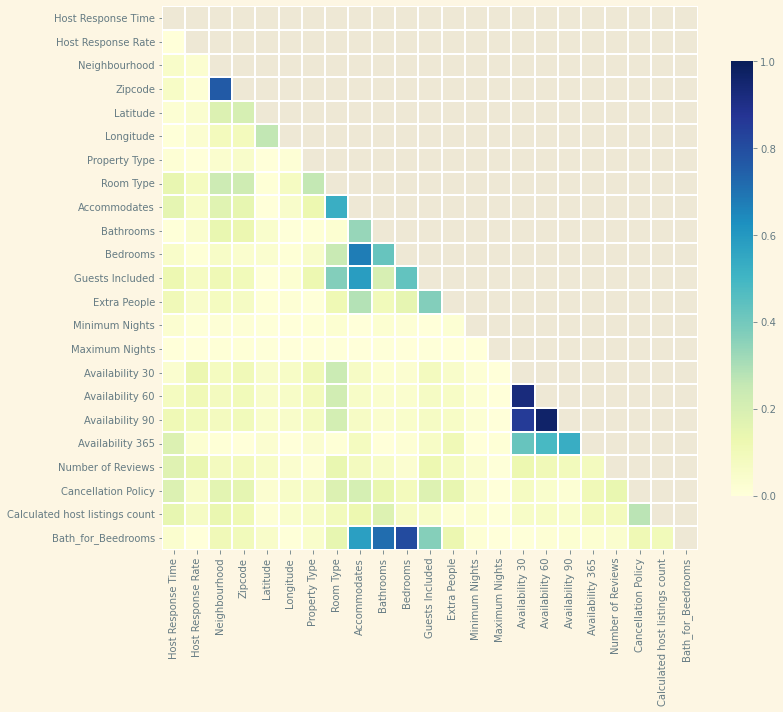

In [45]:
# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

* La disponibilidades a diferentes rangos están muy correladas, por tanto nos vamos a quedar unicamente con la disponibilidad a 30 días.

In [46]:
df_train.drop(['Availability 60', 'Availability 90', 'Availability 365'], axis=1, inplace=True)

## Outliers en Price.

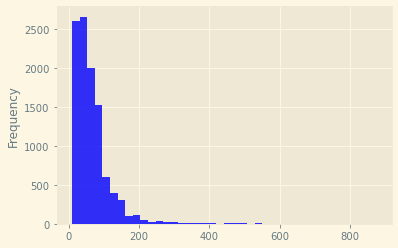

In [47]:
df_train["Price"].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
plt.show()

In [48]:
len(df_train[df_train["Price"] > 350])

62

* Hay 62 filas con precios mayores de 350 € que es aproximadamente un 0,5 % del dataset, por tanto vamos a considerarlos outliers y vamos a eliminarlos.

In [49]:
df_train.drop(df_train[df_train['Price']>350].index, inplace = True)
df_train.shape

(10479, 21)

* Pasamos los precios en escala logarítmica para obtener una distribución mas gausiana.

In [50]:
df_train['Price'] = np.log10(df_train['Price'])

* Histograma de todas las variables para ver su distribución.

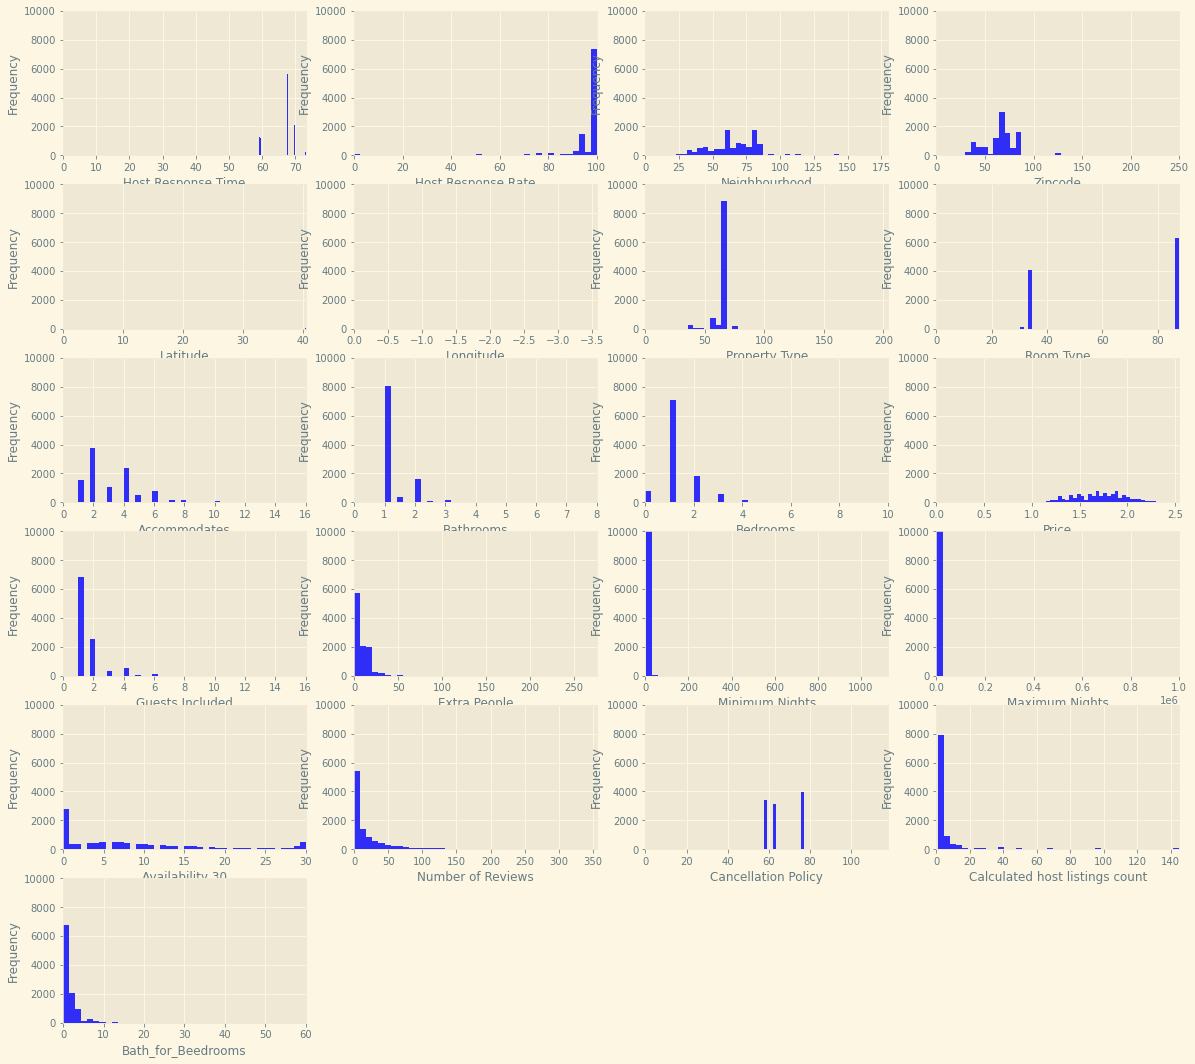

In [51]:
plt.figure(figsize=(20, 25))

for i, c in enumerate(df_train.columns):
    plt.subplot(8, 4, i + 1)
    df_train[c].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
    plt.axis([0, np.max(df_train[c]), 0, 10000])
    plt.xlabel(c)

plt.show()

* Podemos ver como las columnas Minimum Nights y Maximum Nights no aportan información al estar todas prácticamente en un mismo valor.

In [52]:
df_train.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)
len(df_train.columns)

19

* Aún nos quedan 19 columnas.
* Tendremos que seguir analizando para reducir la dimensionalidad.
* Organizamos las columnas de train para poder dividir entre características y variable objetivo.

In [53]:
df_train.columns

Index(['Host Response Time', 'Host Response Rate', 'Neighbourhood', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Guests Included', 'Extra People',
       'Availability 30', 'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Bath_for_Beedrooms'],
      dtype='object')

* Movemos la columna Price a la primera posición

In [54]:
df_train = df_train[['Price','Host Response Time', 'Host Response Rate', 
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',       
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Bath_for_Beedrooms']]
df_train.head()

,Price,Host Response Time,Host Response Rate,Neighbourhood,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Guests Included,Extra People,Availability 30,Number of Reviews,Cancellation Policy,Calculated host listings count,Bath_for_Beedrooms
0,1.778151,69.950897,100.0,104.492308,83.553785,40.407732,-3.684819,67.775218,87.674157,4,1.0,1.0,1,0,9,12,63.005709,2.0,1.0
1,1.698970,67.626960,100.0,84.342342,67.590717,40.415802,-3.705340,67.775218,87.674157,4,1.0,1.0,1,0,15,20,57.398825,1.0,1.0
2,1.000000,67.626960,100.0,39.898089,38.408602,40.389048,-3.740374,67.775218,30.129252,1,1.5,1.0,1,0,14,0,63.005709,16.0,1.5
3,1.477121,69.950897,100.0,59.132313,67.590717,40.412814,-3.703052,67.775218,34.258160,2,3.0,1.0,1,0,0,0,76.253018,97.0,3.0
4,1.505150,67.626960,100.0,53.504587,61.769392,40.438631,-3.713716,67.775218,34.258160,2,1.0,1.0,1,10,7,97,76.253018,2.0,1.0


In [55]:
data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_train.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

## Decision Tree.

best parameters: {'max_depth': 8}


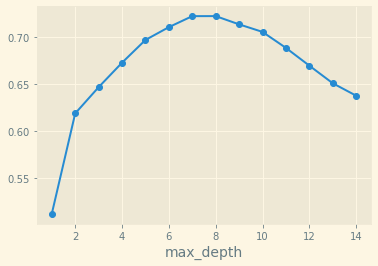

In [56]:
max_depth = range(1,15)
parameters = {'max_depth': max_depth}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=5)
grid.fit(XtrainScaled, y_train)

print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth, scores, '-o')
plt.xlabel('max_depth', fontsize=14)
plt.show()

In [57]:
max_depth_opt = grid.best_params_['max_depth']

reg_tree = DecisionTreeRegressor(max_depth=max_depth_opt).fit(XtrainScaled, y_train)

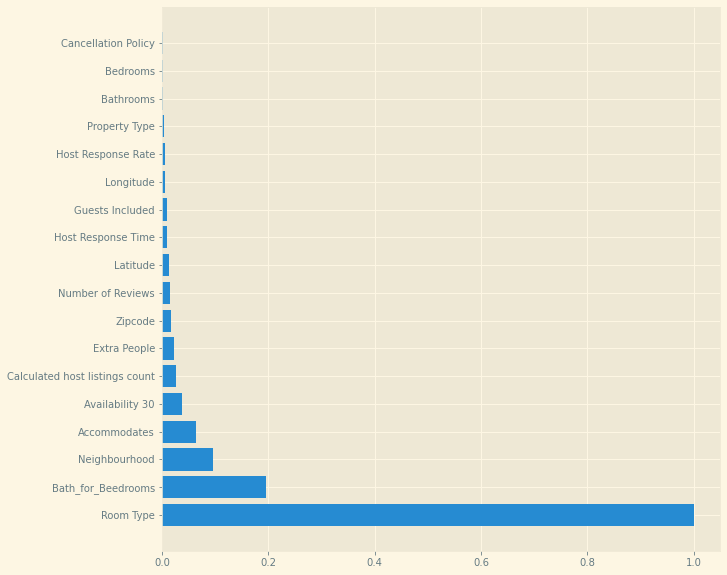

In [58]:
importances = reg_tree.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Random Forest.

best mean cross-validation score: 0.787
best parameters: {'max_depth': 19}


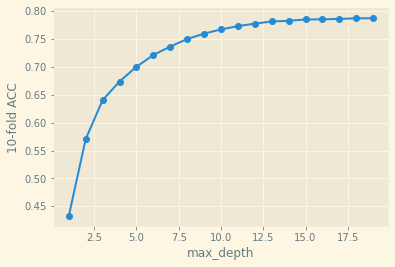

In [59]:
maxDepth = range(1,20)
parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=parameters, cv=5) 
grid.fit(XtrainScaled, y_train.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

* La mejor profundidad que nos da es 19, pero creo que desde 12 la mejora es mínima y así hacemos el modelo mas sencillo

In [60]:
model = RandomForestRegressor(max_depth=12,n_estimators=200,max_features='sqrt').fit(X_train,y_train.ravel())

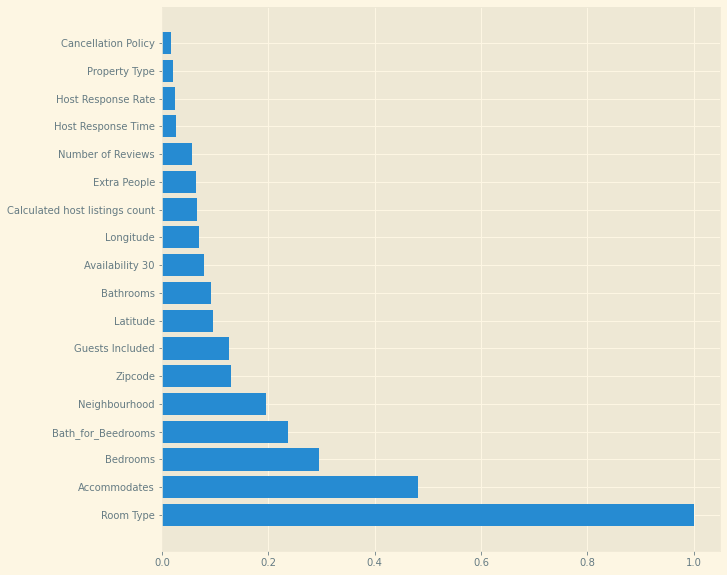

In [61]:
importances = model.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

* Hay variables que no tienen apenas peso para el modelo.
* Prescindimos de las siguientes variables:

In [62]:
df_train.drop(['Cancellation Policy', 'Property Type', 'Host Response Rate', 'Host Response Time', 'Number of Reviews', 'Extra People', 'Calculated host listings count', 'Longitude'], 
    axis=1, inplace=True)

In [63]:
data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

## 2.- Modelos de Predicción

## Transformaciones para test

In [64]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

df_test.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Beds', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 'Features' 
    ], 
    axis=1, inplace=True)

df_test['Price'] = np.log10(df_test['Price'])
df_test['Neighbourhood'] = df_test['Neighbourhood'].fillna(df_test['Neighbourhood Cleansed'])
df_test.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)
df_test = df_test[df_test['City'] == "Madrid"]
df_test.drop(['City'], axis=1, inplace=True)
df_test.drop(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee'], 
             axis=1, inplace=True)
df_test['Bathrooms'] = df_test['Bathrooms'].fillna(value=1)
df_test.drop(df_test[df_test['Bedrooms'].isnull()].index, inplace = True)
df_test.drop(df_test[df_test['Price'].isnull()].index, inplace = True)
df_test["Host Response Rate"].fillna(mean_host_resp, inplace=True)
df_test['Zipcode'] = df_test['Zipcode'].fillna('unknown')
df_test['Host Response Time'] = df_test['Host Response Time'].fillna('unknown')
df_test.drop(['Availability 60', 'Availability 90', 'Availability 365'], axis=1, inplace=True)
df_test['Bath_for_Beedrooms'] = df_test['Bedrooms'] * df_test['Bathrooms']
df_test.drop(df_train[df_train['Price']>350].index, inplace = True)
df_test.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)
columns = ['Price','Host Response Time', 'Host Response Rate', 
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',       
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Bath_for_Beedrooms']
df_test = df_test[columns]
df_test.drop([
    'Cancellation Policy', 'Property Type', 'Host Response Rate',
    'Host Response Time', 'Number of Reviews', 'Extra People', 
    'Calculated host listings count', 'Longitude'], 
    axis=1, inplace=True)

categorical_feature_mask = df_test.dtypes==object
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
for c in categorical_cols:
    df_test[c] = df_test[c].map(mean_map[c])

In [65]:
df_test.isnull().any()

Price                 False
Neighbourhood          True
Zipcode                True
Latitude              False
Room Type             False
Accommodates          False
Bathrooms             False
Bedrooms              False
Guests Included       False
Availability 30       False
Bath_for_Beedrooms    False
dtype: bool

In [66]:
df_test['Neighbourhood'].isnull().sum()

1

In [67]:
df_test['Zipcode'].isnull().sum()

8

* En el dataset de test tenemos 9 registros con NA debido al codificado de variables, como es una cantidad insignificante vamos a eliminar esos registros.

In [68]:
df_test.drop(df_test[df_test['Neighbourhood'].isnull()].index, inplace = True)
df_test.drop(df_test[df_test['Zipcode'].isnull()].index, inplace = True)

In [69]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# este escalado se realiza con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

## Regresión lineal.

In [70]:
lr = LinearRegression().fit(XtrainScaled, y_train)
print("Accuracy en train:", lr.score(XtrainScaled, y_train))
print("Accuracy en test:", lr.score(XtestScaled, y_test))

Accuracy en train: 0.6797406077688654
Accuracy en test: 0.670727126782146


## Decision Tree.

best parameters: {'max_depth': 8}


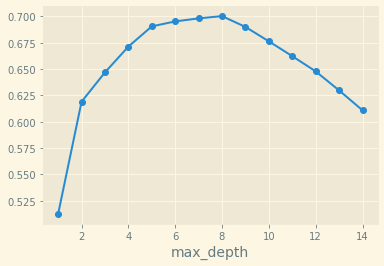

In [71]:
max_depth = range(1,15)
parameters = {'max_depth': max_depth}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=5)
grid.fit(XtrainScaled, y_train)

print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth, scores, '-o')
plt.xlabel('max_depth', fontsize=14)
plt.show()

In [72]:
max_depth_opt = grid.best_params_['max_depth']
reg_tree = DecisionTreeRegressor(max_depth=max_depth_opt).fit(XtrainScaled, y_train)

In [73]:
print("Accuracy en train:", reg_tree.score(XtrainScaled, y_train))
print("Accuracy en test:", reg_tree.score(XtestScaled, y_test))

Accuracy en train: 0.7624579941621803
Accuracy en test: 0.6656709711519972


# Random forest.

best mean cross-validation score: 0.741
best parameters: {'max_depth': 13}


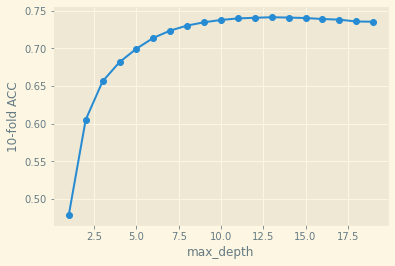

In [74]:
maxDepth = range(1,20)
parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=parameters, cv=5) 
grid.fit(XtrainScaled, y_train.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

* La mejor profundidad que nos da es 13, pero creo que desde 10 la mejora es mínima

In [75]:
model = RandomForestRegressor(max_depth=10,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())

In [76]:
print("Accuracy en train:", model.score(XtrainScaled, y_train))
print("Accuracy en test:", model.score(XtestScaled, y_test))

Accuracy en train: 0.800528353098436
Accuracy en test: 0.7169706398515193


* La diferencia entre train y test es muy alta.Es probable que se esté produciendo overfitting.
* Probamos con profundidades inferiores

In [77]:
model = RandomForestRegressor(max_depth=9,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())
print("Accuracy en train:", model.score(XtrainScaled, y_train))
print("Accuracy en test:", model.score(XtestScaled, y_test))

Accuracy en train: 0.7829607070168433
Accuracy en test: 0.713524706601739


In [78]:
model = RandomForestRegressor(max_depth=8,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())
print("Accuracy en train:", model.score(XtrainScaled, y_train))
print("Accuracy en test:", model.score(XtestScaled, y_test))

Accuracy en train: 0.765503966920617
Accuracy en test: 0.7084662917526212


In [79]:
model = RandomForestRegressor(max_depth=7,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())
print("Accuracy en train:", model.score(XtrainScaled, y_train))
print("Accuracy en test:", model.score(XtestScaled, y_test))

Accuracy en train: 0.7479285248246572
Accuracy en test: 0.7008738171473692


In [80]:
model = RandomForestRegressor(max_depth=6,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train.ravel())
print("Accuracy en train:", model.score(XtrainScaled, y_train))
print("Accuracy en test:", model.score(XtestScaled, y_test))

Accuracy en train: 0.7311194425987185
Accuracy en test: 0.6915368170412228


* Podemos observar como los resultados de regresión lineal y con el árbol de decisión son prácticamente iguales.
* Con el random forest tenemos una mejora mayor por lo que elegiríamos este modelo con profundidad 7.